In [2]:
import yfinance as yf, numpy as np, datetime as dt,matplotlib.pyplot as plt
from scipy.stats import norm


In [3]:
tickers=['GOF','CCD','DX','USA','ARCC']
weights=np.array([0.3,0.3,0.1,0.1,0.2])

In [5]:
start=dt.datetime(2019,1,1)
end=dt.datetime.now()
# notice how the now function can come into handy
df=yf.download('GOF',start,end)

[*********************100%***********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,18.209999,19.090000,18.139999,18.870001,11.846918,354700
2019-01-03,18.930000,19.150000,18.660000,18.860001,11.840632,179200
2019-01-04,19.020000,19.049999,18.700001,18.820000,11.815523,278200
2019-01-07,18.850000,19.340000,18.850000,19.299999,12.116874,214500
2019-01-08,19.510000,19.639999,19.340000,19.490000,12.236158,194700
...,...,...,...,...,...,...
2022-12-16,15.950000,15.980000,15.800000,15.900000,15.900000,605800
2022-12-19,15.920000,15.920000,15.660000,15.740000,15.740000,762400
2022-12-20,15.660000,15.720000,15.520000,15.610000,15.610000,650800


In [7]:
# to having the df for portfolio
# we can do as below:
dfall=yf.download(tickers,start,end)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [8]:
dfall

,ARCC,CCD,DX,GOF,USA
Date,,,,,
2019-01-02,10.592238,11.867771,11.536770,11.846917,3.612476
2019-01-03,10.448638,11.783597,11.714561,11.840635,3.545328
2019-01-04,10.776867,12.092220,11.931864,11.815523,3.612476
2019-01-07,11.002526,12.477990,12.149167,12.116876,3.706480
2019-01-08,11.214507,12.590217,12.168919,12.236160,3.766912
...,...,...,...,...,...
2022-12-16,18.360001,20.980000,12.820400,15.900000,5.880000
2022-12-19,17.980000,20.700001,12.909500,15.740000,5.820000
2022-12-20,18.379999,20.830000,12.959000,15.610000,5.810000


In [12]:
returns=dfall.pct_change() # build in function or dir

In [13]:
returns # here is the daily return by defult 

,ARCC,CCD,DX,GOF,USA
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.013557,-0.007093,0.015411,-0.000530,-0.018588
2019-01-04,0.031414,0.026191,0.018550,-0.002121,0.018940
2019-01-07,0.020939,0.031902,0.018212,0.025505,0.026022
2019-01-08,0.019267,0.008994,0.001626,0.009845,0.016304
...,...,...,...,...,...
2022-12-16,-0.012903,-0.008038,-0.018939,-0.005629,-0.013423
2022-12-19,-0.020697,-0.013346,0.006950,-0.010063,-0.010204
2022-12-20,0.022247,0.006280,0.003834,-0.008259,-0.001718


In [14]:
#HERE to calculate coveriance matrix
cov_matrix=returns.cov()
cov_matrix

,ARCC,CCD,DX,GOF,USA
ARCC,0.000497,0.000338,0.000283,0.000205,0.000301
CCD,0.000338,0.000487,0.000302,0.000233,0.000320
DX,0.000283,0.000302,0.000658,0.000157,0.000263
GOF,0.000205,0.000233,0.000157,0.000228,0.000174
USA,0.000301,0.000320,0.000263,0.000174,0.000365


In [15]:
avg_returns=returns.mean()
avg_returns

ARCC    0.000793
CCD     0.000807
DX      0.000438
GOF     0.000395
USA     0.000661
dtype: float64

In [16]:
count=returns.count()
count

ARCC    1002
CCD     1002
DX      1002
GOF     1002
USA     1002
dtype: int64

In [17]:
count[0]

1002

In [21]:
#note here we use @ to assign the weight
portfolio_mean=avg_returns@weights
portfolio_std=np.sqrt(weights.T@ cov_matrix@weights)

In [137]:
portfolioretunr=returns@weights
portfolioretunr

Date
2019-01-02         NaN
2019-01-03   -0.008424
2019-01-04    0.022712
2019-01-07    0.025429
2019-01-08    0.012886
                ...   
2022-12-16   -0.011424
2022-12-19   -0.012565
2022-12-20    0.007772
2022-12-21    0.005478
2022-12-22   -0.010579
Length: 1003, dtype: float64

In [134]:
import seaborn as sns
%matplotlib inline

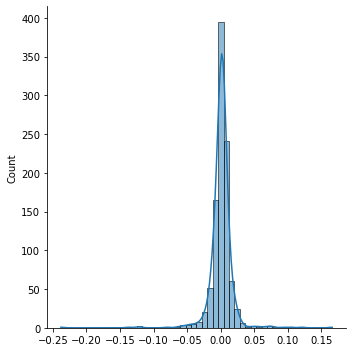

In [162]:
# kde plot is the line;kernal density estimation plot;
## https://en.wikipedia.org/wiki/Kernel_density_estimation
sns.displot(portfolioretunr,kde=True,bins=50)
            

<AxesSubplot:ylabel='Density'>

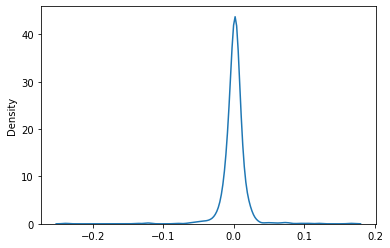

In [164]:
sns.kdeplot(portfolioretunr)

In [155]:
# this also support the joint functions
# sns.jointplot(x='columnname',y='columnsname',data=df)  # joint plot can be very powerful ; kind='reg'--sea born will build 
#regression -linear
#if kind=kde will show the 2 dimensional kde
#https://www.youtube.com/watch?v=lTc7NU9XpWE
#sns.pairplot(df)   willshow diff studys all at once

# Pair Plot

<AxesSubplot:>

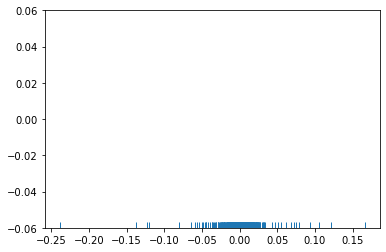

In [161]:
sns.rugplot(portfolioretunr) # show tendency ?

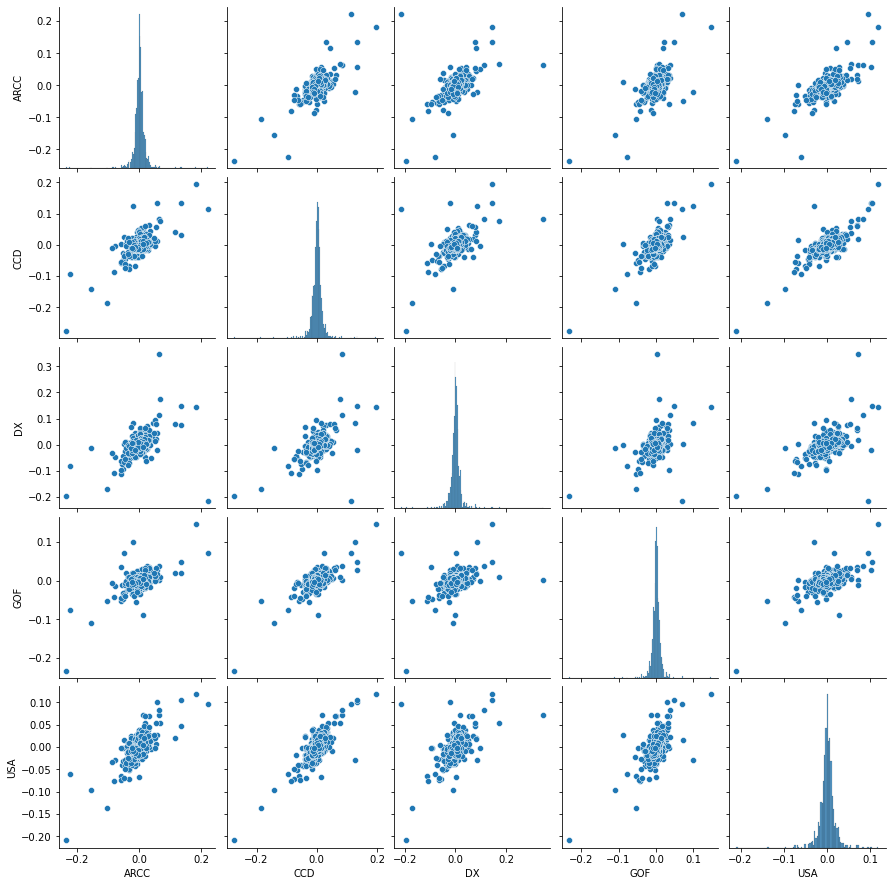

In [156]:
sns.pairplot(returns) # now seems lots more funs # hue='catagorical columns'

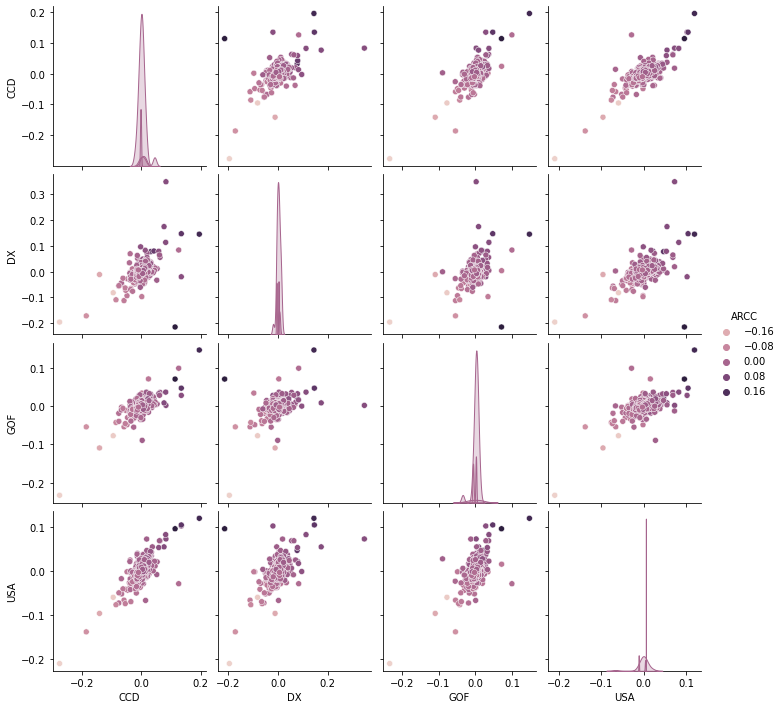

In [159]:
sns.pairplot(returns,hue='ARCC')  # Study hue further# here we shouldn't apply other wise it just show distinct value level?

In [22]:
# note here is the calculated daily return
portfolio_mean

0.0006954919301130848

In [24]:
portfolio_std

0.018148685256449366

In [26]:
# note arrange give even interval good for x aixes
x=np.arange(-0.05,0.05,0.001)
x

array([-5.00000000e-02, -4.90000000e-02, -4.80000000e-02, -4.70000000e-02,
       -4.60000000e-02, -4.50000000e-02, -4.40000000e-02, -4.30000000e-02,
       -4.20000000e-02, -4.10000000e-02, -4.00000000e-02, -3.90000000e-02,
       -3.80000000e-02, -3.70000000e-02, -3.60000000e-02, -3.50000000e-02,
       -3.40000000e-02, -3.30000000e-02, -3.20000000e-02, -3.10000000e-02,
       -3.00000000e-02, -2.90000000e-02, -2.80000000e-02, -2.70000000e-02,
       -2.60000000e-02, -2.50000000e-02, -2.40000000e-02, -2.30000000e-02,
       -2.20000000e-02, -2.10000000e-02, -2.00000000e-02, -1.90000000e-02,
       -1.80000000e-02, -1.70000000e-02, -1.60000000e-02, -1.50000000e-02,
       -1.40000000e-02, -1.30000000e-02, -1.20000000e-02, -1.10000000e-02,
       -1.00000000e-02, -9.00000000e-03, -8.00000000e-03, -7.00000000e-03,
       -6.00000000e-03, -5.00000000e-03, -4.00000000e-03, -3.00000000e-03,
       -2.00000000e-03, -1.00000000e-03,  4.16333634e-17,  1.00000000e-03,
        2.00000000e-03,  

In [28]:
#pdf probability density function
norm_dist=norm.pdf(x,portfolio_mean,portfolio_std)

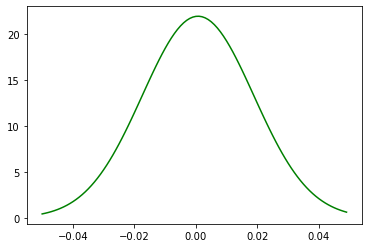

In [29]:
plt.plot(x,norm_dist,c='g')

# Parametric VaR

In [30]:
#percentage point function ## note we need to manually plot the z score
confidence_lv=0.05
Var=norm.ppf(confidence_lv,portfolio_mean,portfolio_std)
Var

-0.02915643883835838

In [32]:
# to see var for a period time eg a month 
num_days=21 # assume 21 trading days in a month 
period_var=Var*np.sqrt(num_days) # note here has to be sqrt
period_var

-0.13361158797212758

In [33]:
# calculate the range with confidence interval
lower=portfolio_mean-2*portfolio_std/np.sqrt(count[0])
higher=portfolio_mean+2*portfolio_std/np.sqrt(count[0])

In [34]:
lower

-0.0004511856040768107

In [36]:
lowermonth=lower*np.sqrt(21)
lowermonth

-0.002067592183156361

In [38]:
highermonth=higher*np.sqrt(21)
higher

0.0018421694643029802

#z 95% interval confidence at 2
#n is the count of total return instance
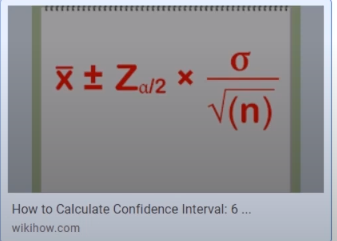

In [ ]:
#refer above fo confidence interval

# caculate the vol for porfolio return

In [58]:
returns


,ARCC,CCD,DX,GOF,USA
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.013557,-0.007093,0.015411,-0.000530,-0.018588
2019-01-04,0.031414,0.026191,0.018550,-0.002121,0.018940
2019-01-07,0.020939,0.031902,0.018212,0.025505,0.026022
2019-01-08,0.019267,0.008994,0.001626,0.009845,0.016304
...,...,...,...,...,...
2022-12-16,-0.012903,-0.008038,-0.018939,-0.005629,-0.013423
2022-12-19,-0.020697,-0.013346,0.006950,-0.010063,-0.010204
2022-12-20,0.022247,0.006280,0.003834,-0.008259,-0.001718


In [68]:
list(returns.columns)

['ARCC', 'CCD', 'DX', 'GOF', 'USA']

In [70]:
tickers=['GOF','CCD','DX','USA','ARCC']
weights=np.array([0.3,0.3,0.1,0.1,0.2])

In [71]:
weightss=list(weights)

In [63]:
returns.iloc[:,0]

Date
2019-01-02         NaN
2019-01-03   -0.013557
2019-01-04    0.031414
2019-01-07    0.020939
2019-01-08    0.019267
                ...   
2022-12-16   -0.012903
2022-12-19   -0.020697
2022-12-20    0.022247
2022-12-21    0.013602
2022-12-22   -0.024155
Name: ARCC, Length: 1003, dtype: float64

In [74]:
weightedreturn=[]
for i in range(len(list(returns.columns))):
    a=returns.iloc[:,i]*weightss[i]
    weightedreturn.append(a)
weightedreturn
for i in weightedreturn:
    
    
        


[Date
 2019-01-02         NaN
 2019-01-03   -0.004067
 2019-01-04    0.009424
 2019-01-07    0.006282
 2019-01-08    0.005780
                 ...   
 2022-12-16   -0.003871
 2022-12-19   -0.006209
 2022-12-20    0.006674
 2022-12-21    0.004081
 2022-12-22   -0.007246
 Name: ARCC, Length: 1003, dtype: float64,
 Date
 2019-01-02         NaN
 2019-01-03   -0.002128
 2019-01-04    0.007857
 2019-01-07    0.009571
 2019-01-08    0.002698
                 ...   
 2022-12-16   -0.002411
 2022-12-19   -0.004004
 2022-12-20    0.001884
 2022-12-21    0.001152
 2022-12-22   -0.003013
 Name: CCD, Length: 1003, dtype: float64,
 Date
 2019-01-02         NaN
 2019-01-03    0.001541
 2019-01-04    0.001855
 2019-01-07    0.001821
 2019-01-08    0.000163
                 ...   
 2022-12-16   -0.001894
 2022-12-19    0.000695
 2022-12-20    0.000383
 2022-12-21   -0.000764
 2022-12-22    0.000622
 Name: DX, Length: 1003, dtype: float64,
 Date
 2019-01-02         NaN
 2019-01-03   -0.000053
 2019-01-0

In [78]:
WeightedFrame=pd.DataFrame(weightedreturn).T
WeightedFrame

,ARCC,CCD,DX,GOF,USA
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.004067,-0.002128,0.001541,-0.000053,-0.003718
2019-01-04,0.009424,0.007857,0.001855,-0.000212,0.003788
2019-01-07,0.006282,0.009571,0.001821,0.002550,0.005204
2019-01-08,0.005780,0.002698,0.000163,0.000984,0.003261
...,...,...,...,...,...
2022-12-16,-0.003871,-0.002411,-0.001894,-0.000563,-0.002685
2022-12-19,-0.006209,-0.004004,0.000695,-0.001006,-0.002041
2022-12-20,0.006674,0.001884,0.000383,-0.000826,-0.000344


In [94]:
WeightedFrame.iloc[1,:].sum()

-0.03369763846921945

In [89]:
av=0
for ivalue in range(len(list(returns.columns))):
    av=av+WeightedFrame.iloc[:,ivalue]

av    

Date
2019-01-02         NaN
2019-01-03   -0.033698
2019-01-04    0.090849
2019-01-07    0.101714
2019-01-08    0.051544
                ...   
2022-12-16   -0.045695
2022-12-19   -0.050260
2022-12-20    0.031088
2022-12-21    0.021910
2022-12-22   -0.042315
Length: 1003, dtype: float64

In [97]:
av.to_frame().dropna().describe() # here std at 0.07

,0
count,1002.000000
mean,0.002782
std,0.072595
min,-0.952364
25%,-0.016775
50%,0.005604
75%,0.023915
max,0.663107


# add MonteCarlo Simulation

In [45]:
import datetime as dt, numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy.stats as scs

In [ ]:
# apply Geometric Brownian Montion for MonteCarlo

In [40]:
# stockprice(t+1)=stockprice(t)* e ^ (d + a * R)
# d=(riskfreerate-variance/2)*timeperiod(dt)
# a=std x sqrt(dt)

In [98]:
numbersimulation=1000000
rfr=0.0654
#30 days
time=30
# standard deviation of return; we need to recalculated it later on 
examplevol=0.07
examplestockprice=1


In [99]:
# one of random stocastic model

In [100]:
# soruce code and info regarding to Geometric Brownian Motion ---https://en.wikipedia.org/wiki/Geometric_Brownian_motion


In [ ]:
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
# info for numpy.random.normal

In [101]:
d=(rfr-0.5*examplevol**2)*(time/252)
a=examplevol*np.sqrt(time/252)
#randomness
#here we assuem it is 1 a standard normal distribution
r=np.random.normal(0,1,(numbersimulation,1)) #1 is the demension for the simulation
Modelreturn=examplestockprice*np.exp(d+a*r)

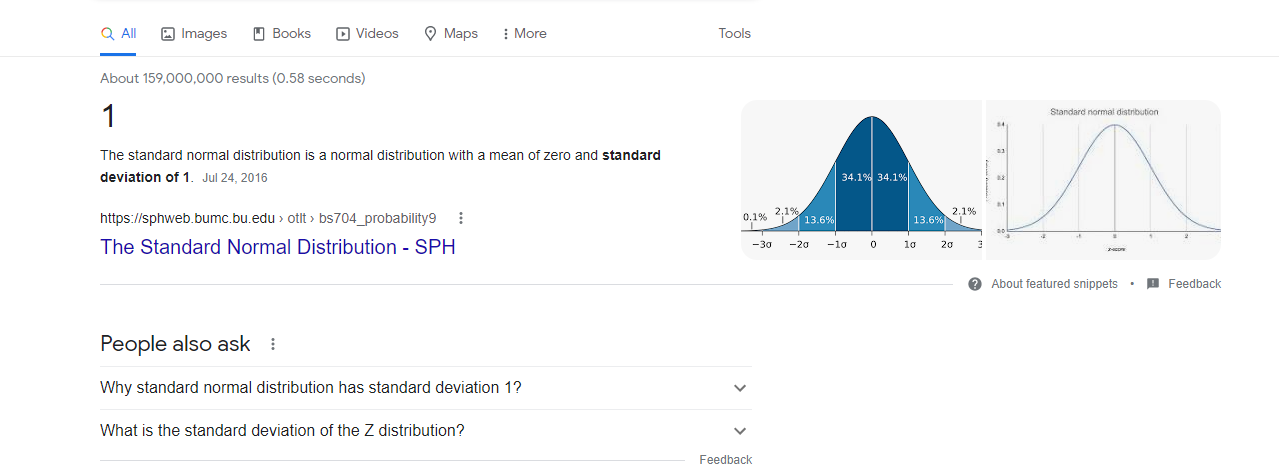

In [102]:
len(r)

1000000

In [103]:
Modelreturn

array([[1.00666827],
       [0.99783304],
       [0.99205419],
       ...,
       [1.00825811],
       [0.99755738],
       [1.04400894]])

In [104]:
# we can then calculate diff value at risk
pers=[0.01,0.1,1.0,2.5,5.0,10.0]  # here imply is the percentage
var=scs.scoreatpercentile(Modelreturn-1,pers) # -1 for the change
var

array([-0.07890641, -0.0651069 , -0.04761203, -0.03911477, -0.03167692,
       -0.02317863])

In [105]:
dfvar=pd.DataFrame(var,pers,columns=['VaR'])
dfvar

,VaR
0.01,-0.078906
0.10,-0.065107
1.00,-0.047612
2.50,-0.039115
5.00,-0.031677
10.00,-0.023179


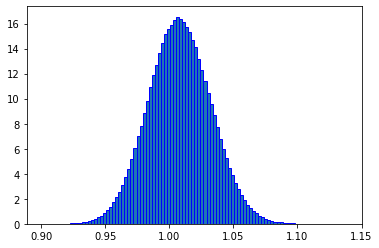

In [118]:
plt.hist(Modelreturn,density=True,bins=100,stacked=True,edgecolor='b') # dennsity to normalize the height of the bar it is very important 
#especailly when cross diff sample size
plt.show()

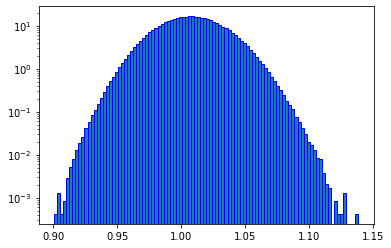

In [119]:
plt.hist(Modelreturn,density=True,bins=100,stacked=True,edgecolor='b', log=True) # dennsity to normalize the height of the bar it is very important 
#especailly when cross diff sample size
plt.show()
# just for fine nad check with the tails

In [120]:
#axvline stand for axis verticle line

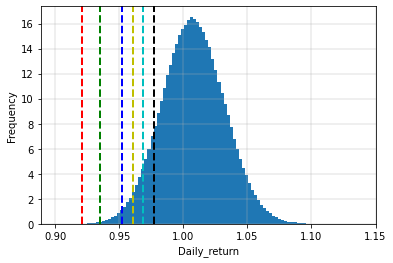

In [106]:
# we can also add additional line
plt.hist(Modelreturn,density=True,bins=100)
plt.axvline(dfvar.loc[0.01]['VaR']+1,color='r',linestyle='dashed',linewidth=2)
plt.axvline(dfvar.loc[0.1]['VaR']+1,color='g',linestyle='dashed',linewidth=2)
plt.axvline(dfvar.loc[1]['VaR']+1,color='b',linestyle='dashed',linewidth=2)
plt.axvline(dfvar.loc[2.5]['VaR']+1,color='y',linestyle='dashed',linewidth=2)
plt.axvline(dfvar.loc[5]['VaR']+1,color='c',linestyle='dashed',linewidth=2)
plt.axvline(dfvar.loc[10]['VaR']+1,color='k',linestyle='dashed',linewidth=2)
plt.ylabel('Frequency')
plt.xlabel('Daily_return')
plt.grid(True,linewidth=.4)
plt.show()

In [ ]:
# we can find more model for monte carlo simulation

In [ ]:
Mode

# extension function considered to add Best weighting finder by loop or numpy